Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.stats import mode
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten


Loading Data

In [2]:

output_filepath = r'C:\Users\Shruti\Desktop\complex_Activity_dc\infowithlabels_with_acc.csv'  # Adjust this path
final_data = pd.read_csv(output_filepath)
print(final_data.head())


       timestamp    ax     ay    az   gx   gy  gz Person      Activity  \
0  1621356793162 -1412 -15888  2180  160  111 -31     P0  brow-lowerer   
1  1621356793171 -1398 -15886  2221  140   91 -12     P0  brow-lowerer   
2  1621356793181 -1399 -15934  2275  137   82  13     P0  brow-lowerer   
3  1621356793191 -1398 -15977  2310  144   66  36     P0  brow-lowerer   
4  1621356793200 -1382 -16008  2347  159   49  47     P0  brow-lowerer   

  IMU_Side     Start_Time       End_Time  Activity_Label  
0     left  1621356572218  1621356793459               1  
1     left  1621356572218  1621356793459               1  
2     left  1621356572218  1621356793459               1  
3     left  1621356572218  1621356793459               1  
4     left  1621356572218  1621356793459               1  


In [3]:
columns=['Person','timestamp','ax','ay','az','gx','gy','gz','Activity']
final_data=final_data[columns]
print(final_data.head())

  Person      timestamp    ax     ay    az   gx   gy  gz      Activity
0     P0  1621356793162 -1412 -15888  2180  160  111 -31  brow-lowerer
1     P0  1621356793171 -1398 -15886  2221  140   91 -12  brow-lowerer
2     P0  1621356793181 -1399 -15934  2275  137   82  13  brow-lowerer
3     P0  1621356793191 -1398 -15977  2310  144   66  36  brow-lowerer
4     P0  1621356793200 -1382 -16008  2347  159   49  47  brow-lowerer


In [4]:
print(final_data.shape)

(13615277, 9)


Data Exploration

In [5]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13615277 entries, 0 to 13615276
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Person     object
 1   timestamp  int64 
 2   ax         int64 
 3   ay         int64 
 4   az         int64 
 5   gx         int64 
 6   gy         int64 
 7   gz         int64 
 8   Activity   object
dtypes: int64(7), object(2)
memory usage: 934.9+ MB
None


In [6]:
unique_persons=final_data['Person'].unique()
print(unique_persons)

['P0' 'P1' 'P10' 'P11' 'P12' 'P13' 'P14' 'P15' 'P16' 'P17' 'P18' 'P19'
 'P2' 'P20' 'P21' 'P22' 'P23' 'P24' 'P25' 'P26' 'P27' 'P28' 'P29' 'P3'
 'P4' 'P5' 'P6' 'P7' 'P8' 'P9']


In [7]:
final_data.describe()

,timestamp,ax,ay,az,gx,gy,gz
count,1.361528e+07,1.361528e+07,1.361528e+07,1.361528e+07,1.361528e+07,1.361528e+07,1.361528e+07
mean,1.627782e+12,-3.988662e+03,-5.765332e+02,-5.623289e+02,-3.456954e+00,2.478883e+01,1.519933e+01
std,7.122321e+09,4.058535e+03,1.248785e+04,9.384900e+03,7.815790e+02,1.104521e+03,1.011221e+03
min,1.621355e+12,-3.273400e+04,-3.276400e+04,-3.276400e+04,-3.276200e+04,-3.001000e+04,-3.099500e+04
25%,1.621445e+12,-6.555000e+03,-1.344900e+04,-8.381000e+03,-7.500000e+01,-4.000000e+01,-2.900000e+01
50%,1.622620e+12,-4.536000e+03,-1.128000e+03,-1.505000e+03,4.000000e+00,2.200000e+01,1.600000e+01
75%,1.635784e+12,-1.858000e+03,1.245700e+04,7.712000e+03,6.400000e+01,9.700000e+01,6.100000e+01
max,1.637344e+12,3.276400e+04,3.276400e+04,3.276400e+04,3.276400e+04,3.276400e+04,3.276400e+04


In [8]:
cnt_of_activity=final_data['Activity'].value_counts()
print(f"Distribution of Activity\n{cnt_of_activity}")

Distribution of Activity
Activity
shake            766824
nod              766792
swallowing       766770
eyes-lr          766747
wink-r           766716
walking          766673
tilt             766445
still            754457
speaking         754207
running          754193
brow-lowerer     754182
brow-raiser      754171
eyes-ud          754164
chin-raiser      754130
lip-puller       754086
wink-l           754031
chewing          731660
mouth-stretch    729029
Name: count, dtype: int64


<Axes: title={'center': 'Number of Samples By Activity'}, xlabel='Activity'>

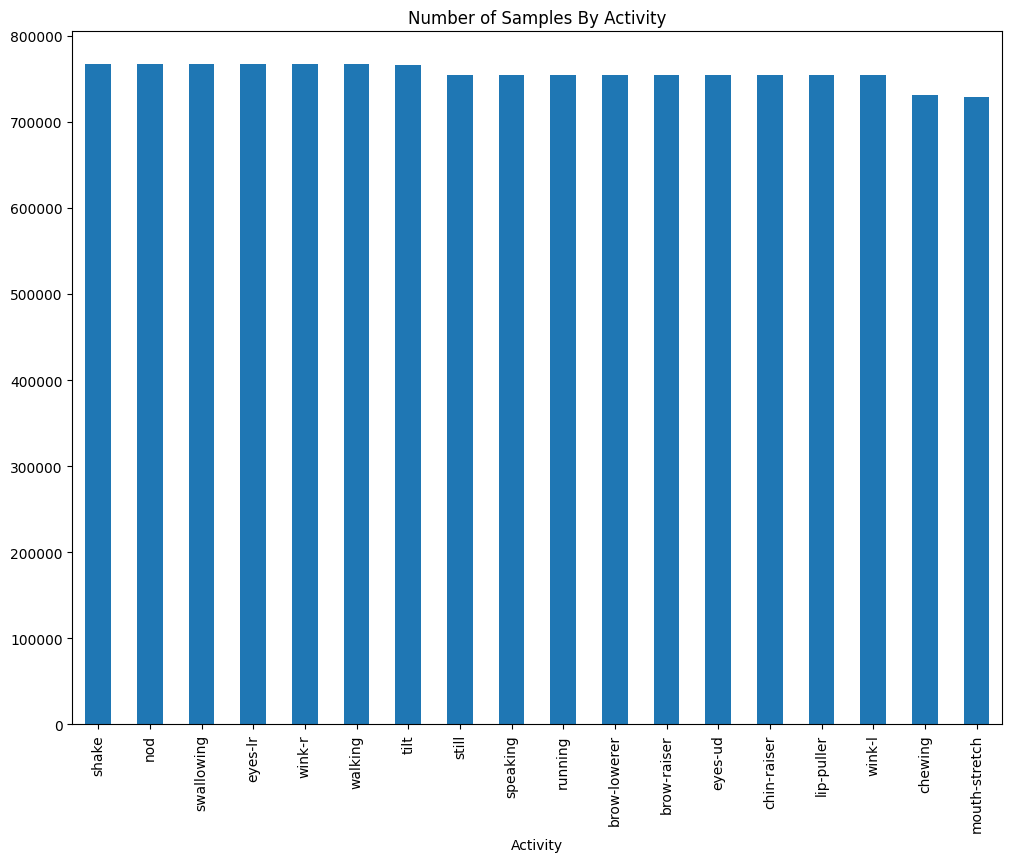

In [9]:
cnt_of_activity.plot(kind='bar',title="Number of Samples By Activity",figsize=(12,9))

In [10]:
activity_per_person=final_data['Person'].value_counts()
print(activity_per_person)

Person
P19    539905
P8     453157
P11    453148
P15    453067
P12    452874
P5     452868
P14    452867
P9     452848
P13    452848
P6     452836
P10    452831
P16    452767
P4     452722
P7     452715
P1     452715
P3     452703
P0     452670
P23    452131
P22    452126
P26    452114
P18    452112
P21    452111
P24    452086
P28    452058
P29    452026
P20    451984
P2     451890
P25    451761
P17    430344
P27    426993
Name: count, dtype: int64


<Axes: title={'center': 'Activity Distribution According to the Participants'}, xlabel='Person'>

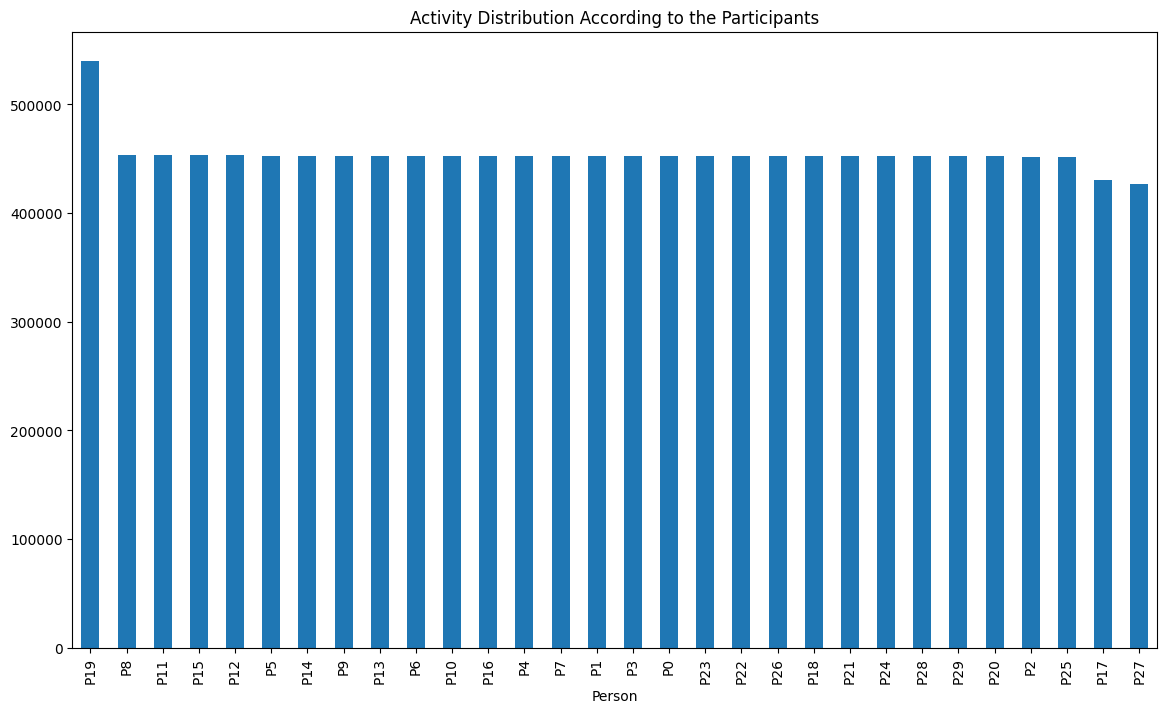

In [11]:
activity_per_person.plot(
    kind="bar", 
    figsize=(14, 8), 
    title="Activity Distribution According to the Participants"
)


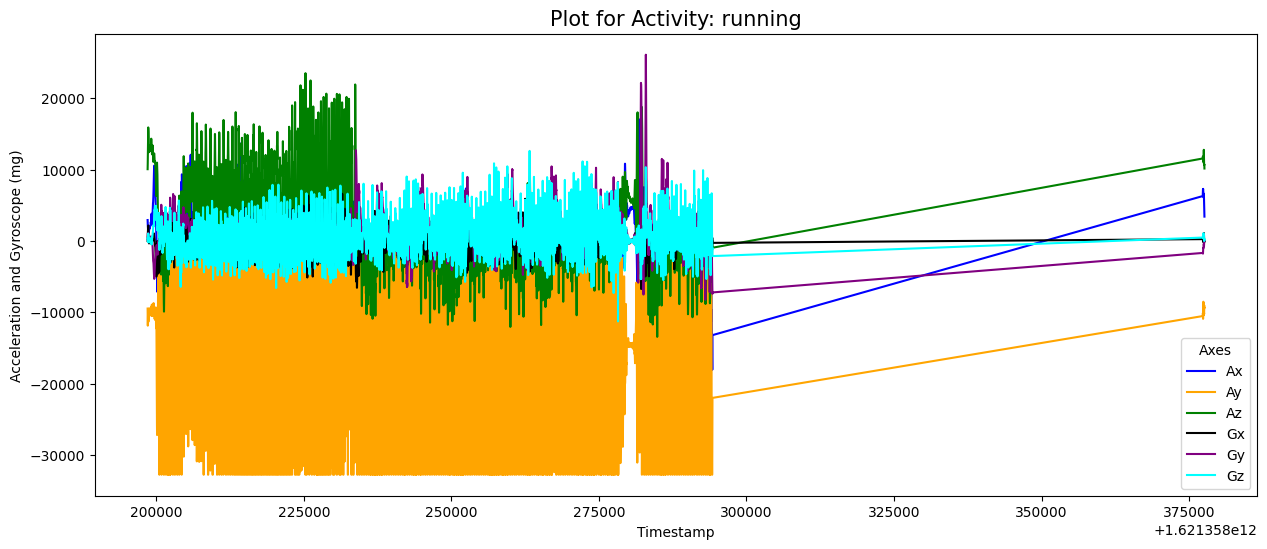

In [12]:

def plot_activity_combined(activity, df):
    
    data_01 = df[df['Activity'] == activity]
    data_01=data_01[:10000] # taking the first 20000 rows of data

    plt.figure(figsize=(15, 6))
    
    # Plotting acceleration and gyroscope signals
    sns.lineplot(y='ax', x='timestamp', data=data_01, label='Ax', color='blue')
    sns.lineplot(y='ay', x='timestamp', data=data_01, label='Ay', color='orange')
    sns.lineplot(y='az', x='timestamp', data=data_01, label='Az', color='green')
    sns.lineplot(y='gx', x='timestamp', data=data_01, label='Gx', color='black')
    sns.lineplot(y='gy', x='timestamp', data=data_01, label='Gy', color='purple')
    sns.lineplot(y='gz', x='timestamp', data=data_01, label='Gz', color='cyan')
    
    # Setting up the legend and labels
    plt.legend(title='Axes')
    plt.ylabel('Acceleration and Gyroscope (mg)')
    plt.title(f'Plot for Activity: {activity}', fontsize=15)
    plt.xlabel('Timestamp')
    
    plt.show()


plot_activity_combined('running', final_data)


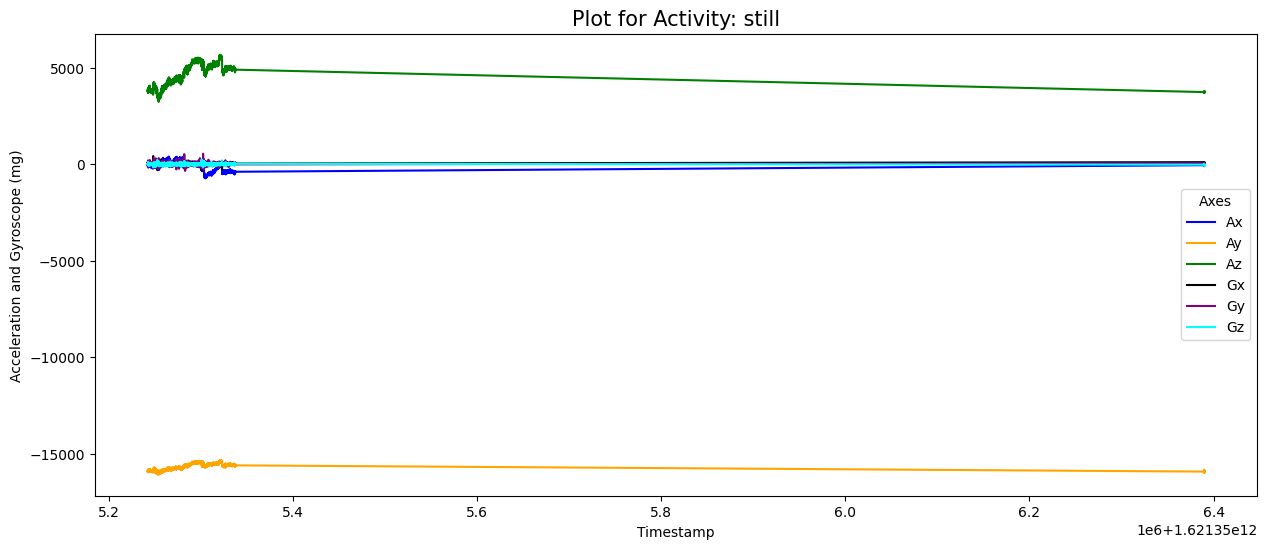

In [13]:
plot_activity_combined('still',final_data)

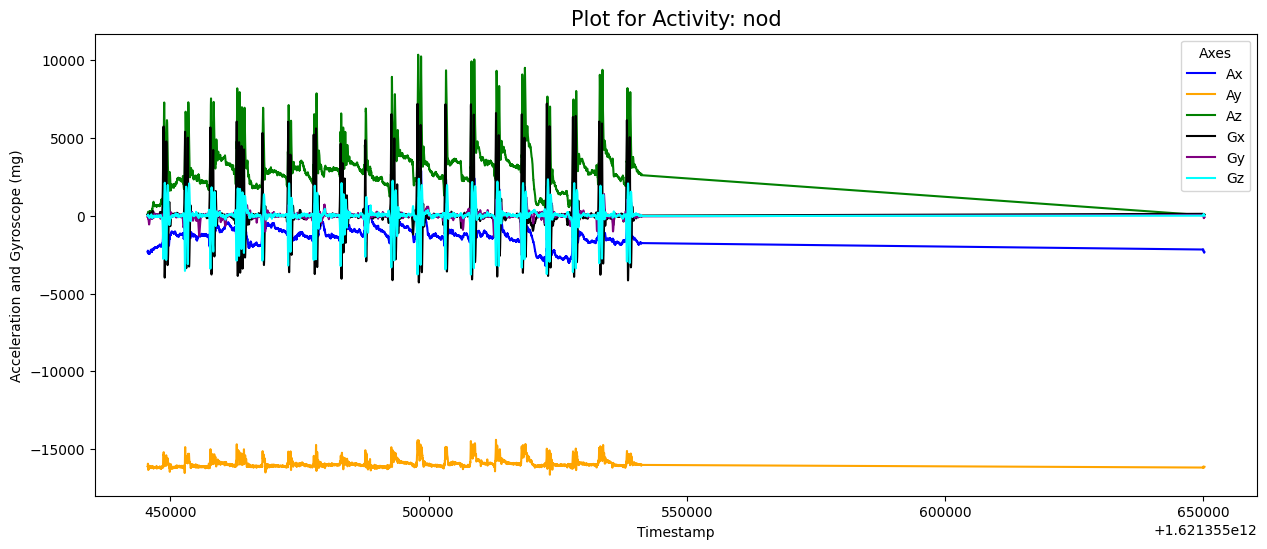

In [14]:
plot_activity_combined('nod',final_data)

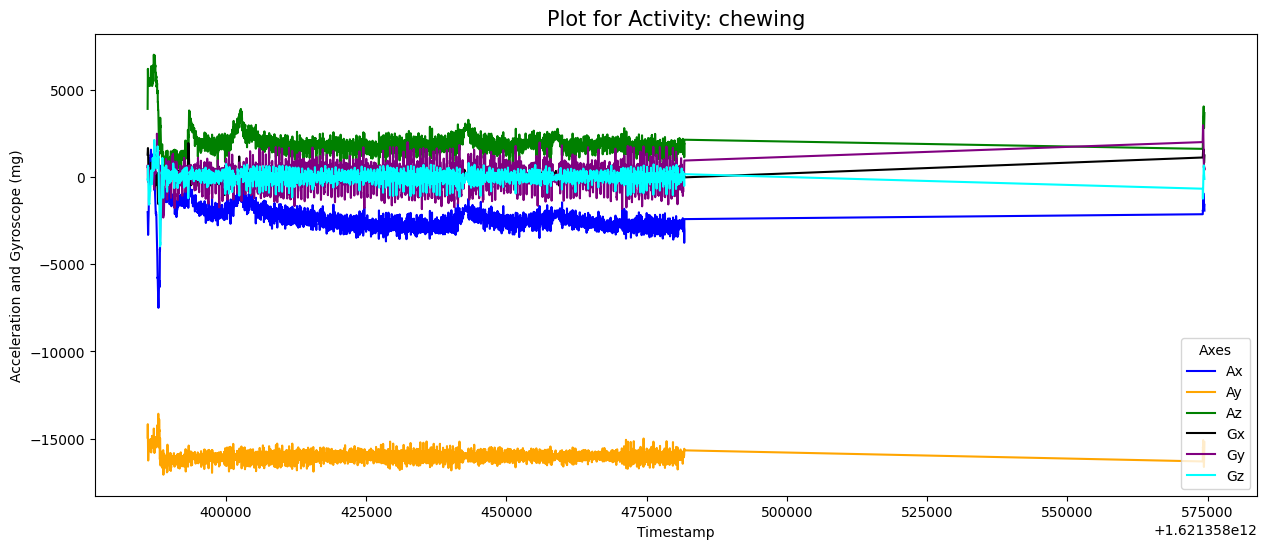

In [15]:
plot_activity_combined('chewing',final_data)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

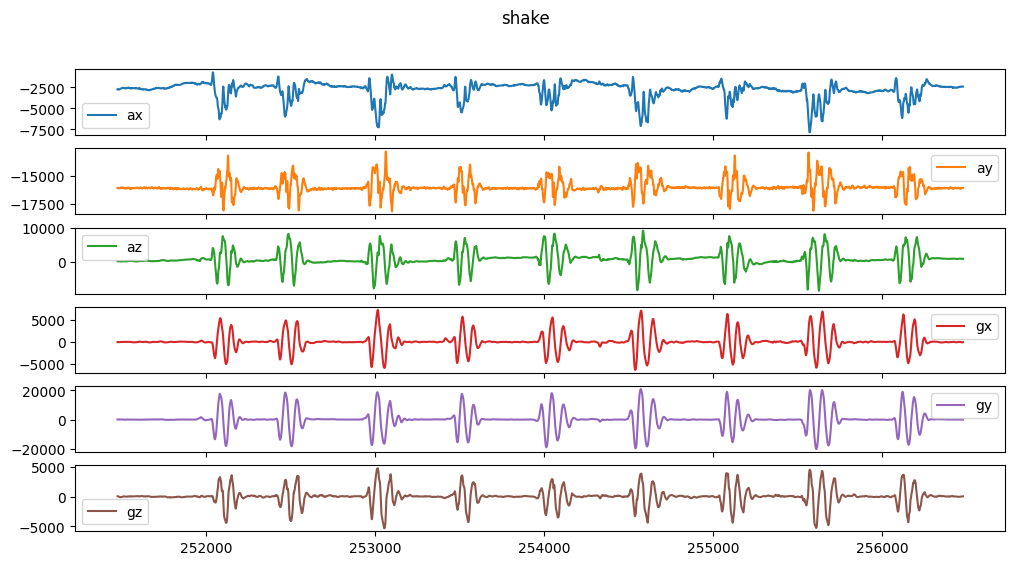

In [16]:
def plot_activity(activity, df):
    # Filter rows for the given activity
    data = df[df['Activity'] == activity]
    
    data = data[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
    
    #Taking first 10,000 rows
    data = data[:5000]

    ax = data.plot(subplots=True, figsize=(12, 6), title=activity)
    return ax

plot_activity('shake', final_data)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

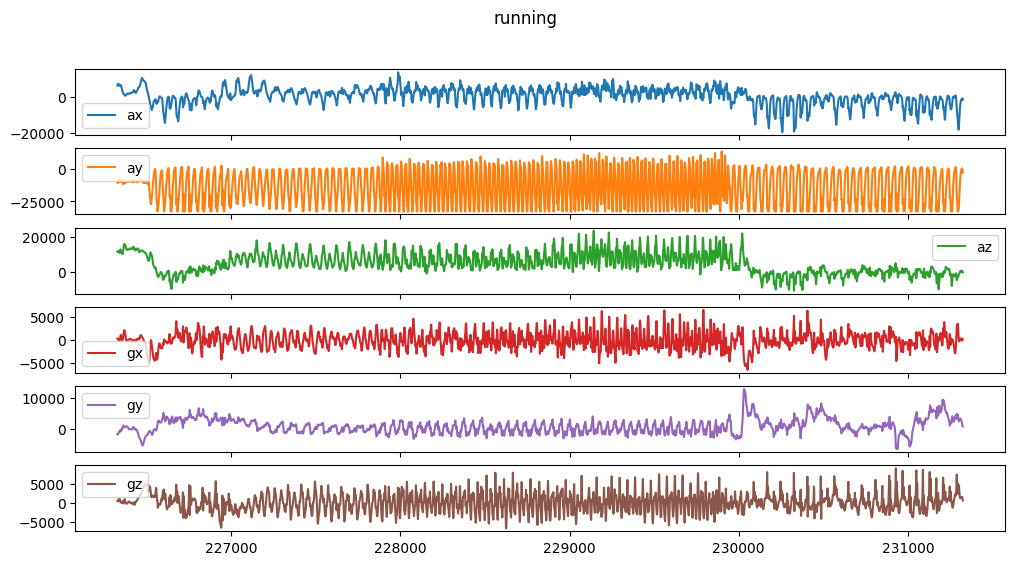

In [17]:
plot_activity('running', final_data)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

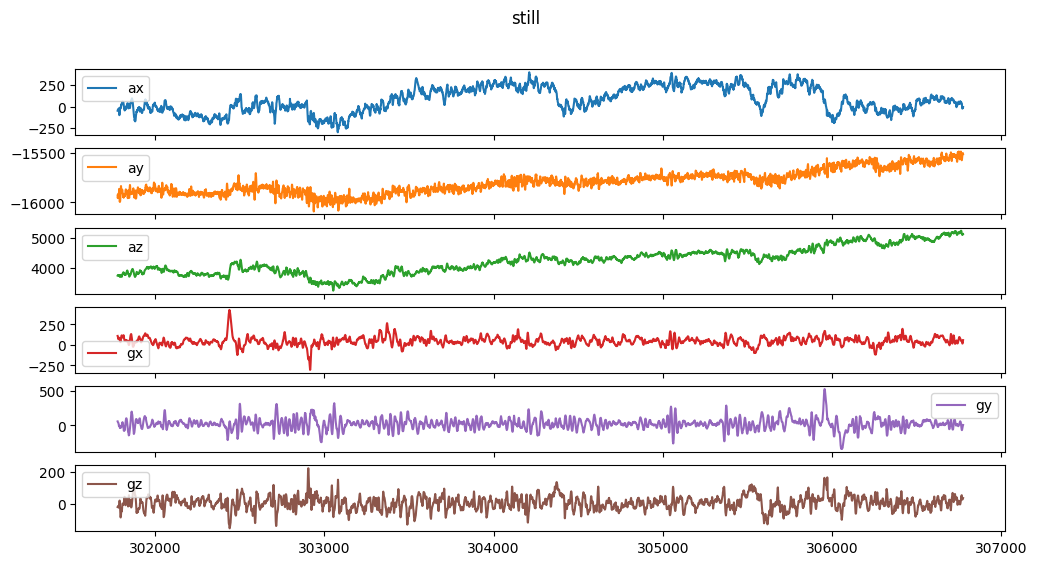

In [18]:
plot_activity('still', final_data)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

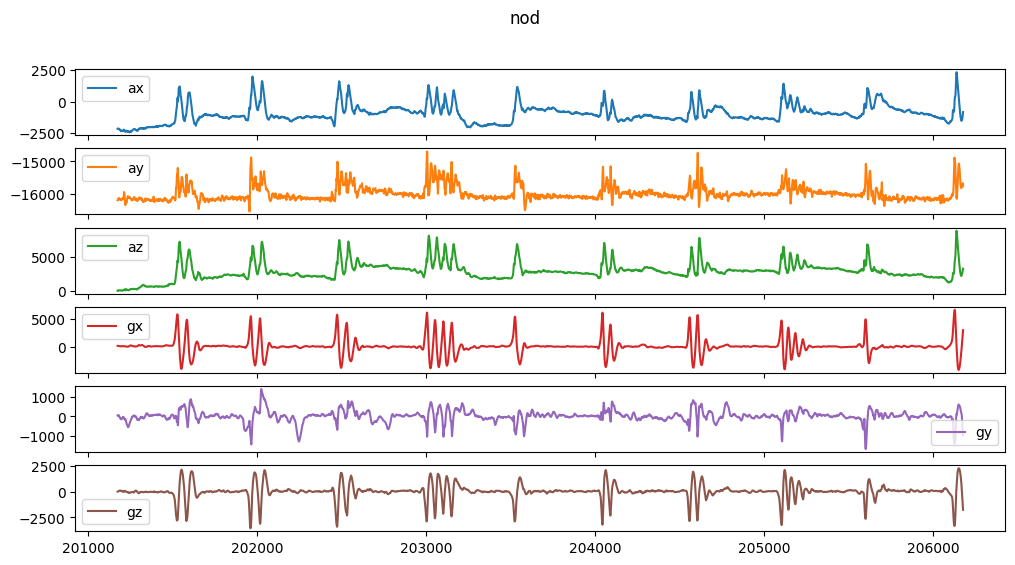

In [19]:
plot_activity('nod', final_data)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

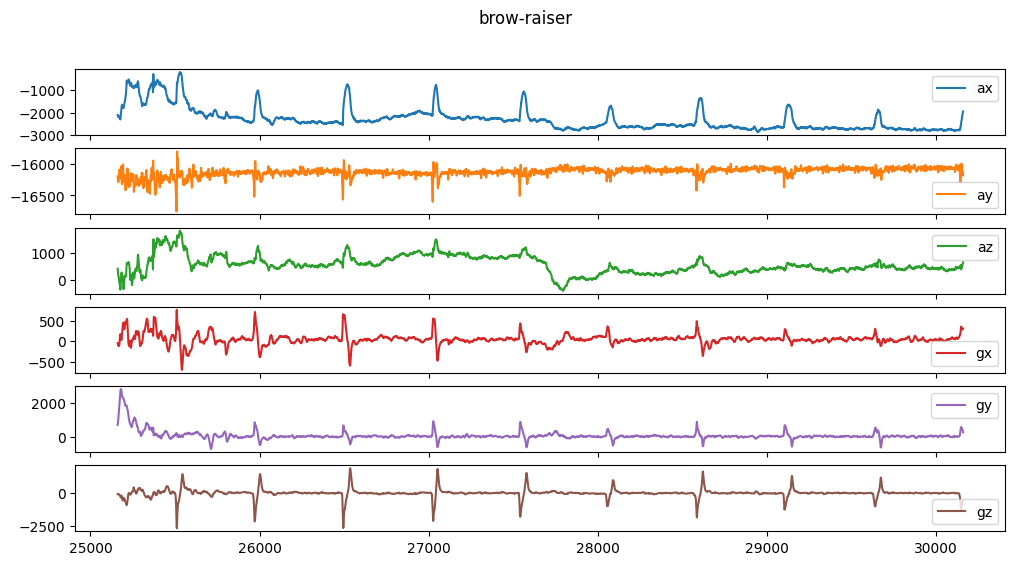

In [20]:
plot_activity('brow-raiser', final_data)

Data Pre-processing

In [21]:
columns=['timestamp','ax','ay','az','gx','gy','gz','Activity']
final_data=final_data[columns]

Sort the data on the timestamp

In [22]:
final_data = final_data.sort_values(by='timestamp')
print(final_data.head())

            timestamp  ax     ay    az   gx  gy  gz Activity
301808  1621355241901  50 -15918  3820  100  23  -3    still
301809  1621355241911  47 -15934  3835  106  10  -4    still
301810  1621355241920  55 -15944  3843  110   0  -7    still
301811  1621355241930  47 -15947  3840  113 -19  -8    still
301812  1621355241940  43 -15943  3847  119 -42  -8    still


Standardise the data

In [23]:
scaler = StandardScaler()
sensor_columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
final_data[sensor_columns] = scaler.fit_transform(final_data[sensor_columns])

In [24]:
final_data.head()

,timestamp,ax,ay,az,gx,gy,gz,Activity
301808,1621355241901,0.995103,-1.228511,0.466955,0.132369,-0.001620,-0.017997,still
301809,1621355241911,0.994364,-1.229793,0.468554,0.140046,-0.013389,-0.018986,still
301810,1621355241920,0.996335,-1.230593,0.469406,0.145164,-0.022443,-0.021953,still
301811,1621355241930,0.994364,-1.230834,0.469086,0.149002,-0.039645,-0.022942,still
301812,1621355241940,0.993379,-1.230513,0.469832,0.156679,-0.060469,-0.022942,still


Encode the Activity

In [25]:
# Encode activity labels into integers
label_encoder = LabelEncoder()
final_data['Activity'] = label_encoder.fit_transform(final_data['Activity'])

In [26]:
final_data.head()

,timestamp,ax,ay,az,gx,gy,gz,Activity
301808,1621355241901,0.995103,-1.228511,0.466955,0.132369,-0.001620,-0.017997,12
301809,1621355241911,0.994364,-1.229793,0.468554,0.140046,-0.013389,-0.018986,12
301810,1621355241920,0.996335,-1.230593,0.469406,0.145164,-0.022443,-0.021953,12
301811,1621355241930,0.994364,-1.230834,0.469086,0.149002,-0.039645,-0.022942,12
301812,1621355241940,0.993379,-1.230513,0.469832,0.156679,-0.060469,-0.022942,12


In [27]:
final_data.tail()

,timestamp,ax,ay,az,gx,gy,gz,Activity
10231976,1637343926368,0.780740,1.383227,-1.231518,-1.054971,0.159536,1.341745,9
10231977,1637343926378,0.776059,1.330215,-1.107702,-0.449786,0.821362,1.053974,9
10231978,1637343926388,0.777537,1.323489,-1.070408,-0.101772,0.894697,0.632701,9
10231979,1637343926397,0.835686,1.342547,-1.090440,0.003144,0.781525,0.298452,9
10231980,1637343926407,0.927345,1.358723,-1.111431,0.049204,0.827699,0.103638,9


Dividing data into segments

In [28]:
# Constants
sampling_freq=100
frame_size = 3*sampling_freq #window size
step_size = 2*sampling_freq #step size
segments = []
labels = []

for i in range(0, len(final_data) - frame_size , step_size):  
    # Extract sensor data for each segment
    a_xs = final_data['ax'].values[i: i + frame_size]
    a_ys = final_data['ay'].values[i: i + frame_size]
    a_zs = final_data['az'].values[i: i + frame_size]
    g_xs = final_data['gx'].values[i: i + frame_size]
    g_ys = final_data['gy'].values[i: i + frame_size]
    g_zs = final_data['gz'].values[i: i + frame_size]

    # Extract activity labels for the current segment
    segment_labels = stats.mode(final_data['Activity'][i: i + frame_size])
    label=pd.Series(segment_labels).mode()[0]
   
    segments.append([a_xs, a_ys, a_zs, g_xs, g_ys, g_zs])
    labels.append(label)


In [29]:
print(len(labels))
unique_val=list(set(labels))
print(unique_val)
label_counts = pd.Series(labels).value_counts()
print(label_counts)

68075
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
1     4048
3     4033
10    3937
4     3903
8     3893
0     3879
6     3872
14    3846
15    3832
12    3764
9     3729
11    3724
13    3707
17    3670
5     3644
16    3563
2     3557
7     3474
Name: count, dtype: int64


In [30]:
np.array(segments).shape

(68075, 6, 300)

In [32]:
reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, frame_size, 6)
reshaped_segments.shape

(68075, 300, 6)

Split the data in the train and test

In [33]:
X_train,X_test,y_train,y_test=train_test_split(reshaped_segments,labels,test_size=0.2,random_state=0)

In [34]:
print(X_train.shape)

(54460, 300, 6)


In [35]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (54460, 300, 6)
X_test shape: (13615, 300, 6)
y_train shape: (54460,)
y_test shape: (13615,)


Model Building

LSTM + CNN

In [38]:
# Define the model
model = Sequential()

model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))) 
model.add(MaxPooling1D(pool_size=2)) 

model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100, return_sequences=False))  
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(18, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=35, validation_data=(X_test, y_test), verbose=1)


Epoch 1/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.2048 - loss: 2.3513 - val_accuracy: 0.3373 - val_loss: 1.9752
Epoch 2/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.3629 - loss: 1.9162 - val_accuracy: 0.4519 - val_loss: 1.6777
Epoch 3/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.4841 - loss: 1.5995 - val_accuracy: 0.5746 - val_loss: 1.3687
Epoch 4/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.6095 - loss: 1.2735 - val_accuracy: 0.6997 - val_loss: 0.9862
Epoch 5/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.7051 - loss: 0.9936 - val_accuracy: 0.7433 - val_loss: 0.8643
Epoch 6/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.7428 - loss: 0.8661 - val_accuracy: 0.7674 - val_loss: 0.7768
Epoch 7/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.7720 - loss: 0.7675 - val_accuracy: 0.7880 - val_loss: 0.7143
Epoch 8/35
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.7849 -

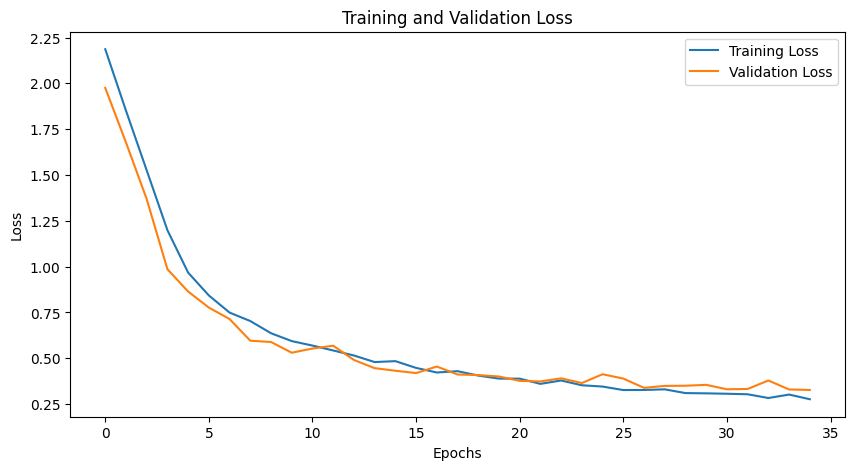

In [39]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.8703    0.8964    0.8831       801
           1     0.9286    0.8525    0.8889       793
           2     0.9735    0.9285    0.9505       713
           3     0.8155    0.9548    0.8796       796
           4     0.9098    0.8805    0.8950       745
           5     0.8974    0.8999    0.8986       739
           6     0.8752    0.8185    0.8459       788
           7     0.8690    0.8569    0.8629       720
           8     0.8965    0.9306    0.9132       735
           9     0.9858    0.9909    0.9883       770
          10     0.9169    0.8543    0.8845       762
          11     0.9161    0.9295    0.9228       752
          12     0.9454    0.9505    0.9479       747
          13     0.9339    0.9314    0.9326       758
          14     0.8837    0.8720    0.8778       758
          15     0.9698    0.9796    0.9747       786
          16     

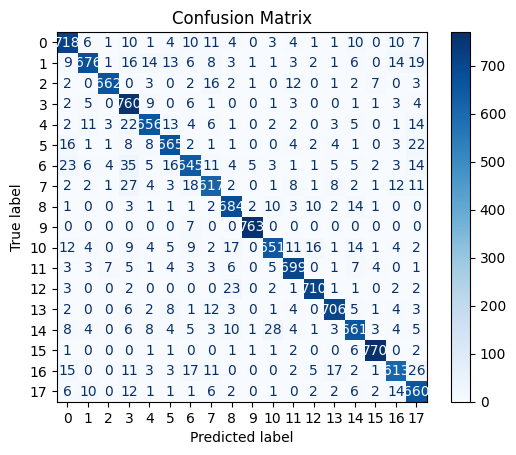

In [40]:

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

# Final accuracy
final_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Random Forest

In [41]:

X_train_flat = X_train.reshape(X_train.shape[0], -1)  
X_test_flat = X_test.reshape(X_test.shape[0], -1)    

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train_flat, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.9486


In [42]:
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9480    0.9563    0.9521       801
           1     0.9504    0.9433    0.9468       793
           2     0.9257    0.9439    0.9347       713
           3     0.9440    0.9535    0.9487       796
           4     0.9608    0.9544    0.9576       745
           5     0.9611    0.9689    0.9650       739
           6     0.9130    0.9454    0.9289       788
           7     0.9538    0.8889    0.9202       720
           8     0.9364    0.9619    0.9490       735
           9     0.9844    0.9844    0.9844       770
          10     0.9595    0.9318    0.9454       762
          11     0.9285    0.9149    0.9216       752
          12     0.9852    0.9826    0.9839       747
          13     0.9561    0.9472    0.9516       758
          14     0.9390    0.9142    0.9265       758
          15     0.9088    0.9885    0.9470       786
          16     0.9676    0.9463    0.9568       726
    

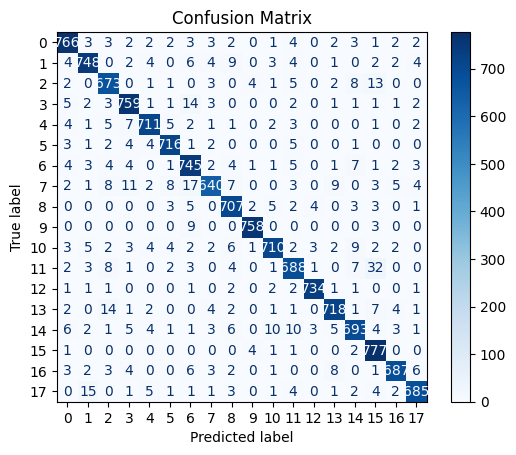

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
